In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [9]:
df=pd.read_csv('/content/goog.csv')

In [10]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [22]:
#df['Close']=df['Close'].str.replace(',','').astype(float)


AttributeError: Can only use .str accessor with string values!

In [13]:
Scaler=MinMaxScaler()

scaled_data=Scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [29]:
def create_seq(data,seq_length):
  x,y=[],[]
  for i in range(len(data)-seq_length):
    x.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(x), np.array(y)

In [30]:
seq_length=3

In [31]:
X,Y = create_seq(scaled_data,seq_length)

In [38]:
train_size = int(len(X)*0.8)

xtrain,xtest= X[:train_size],X[train_size:]
ytrain,ytest= Y[:train_size],Y[train_size:]


In [39]:
model=Sequential()

model.add(LSTM(units=30, return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(units=30))
model.add(Dense(1))

In [42]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 30)             3840      
                                                                 
 lstm_3 (LSTM)               (None, 30)                7320      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11191 (43.71 KB)
Trainable params: 11191 (43.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.fit(xtrain,ytrain,epochs=50,batch_size=10)

Epoch 1/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0144
Epoch 6/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 7/50
5/5 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 0.0143
Epoch 10/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 11/50
5/5 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 12/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 13/50
5/5 [==============================] - 0s 6ms/step - loss: 0.

In [54]:
predictions=model.predict(xtest)

1/1 [==============================] - 0s 19ms/step


In [55]:
prediction=Scaler.inverse_transform(predictions)

Text(0.5, 1.0, 'Google stock price prediction')

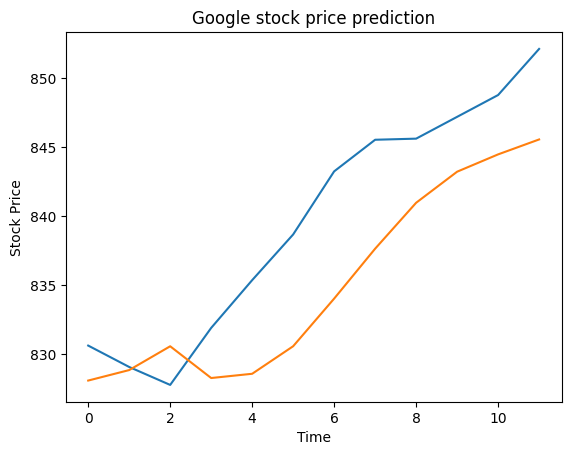

In [56]:
plt.plot(df['Close'].values[train_size+seq_length:],label="Actual Price")
plt.plot(prediction,label="Predicted Values")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google stock price prediction')

In [60]:
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(df['Close'].values[train_size+seq_length:],prediction))
rmse

5.665281273615736